# Hi :)

----

# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sensors_data= pd.read_excel('Datasets/Variance_estimation_experiment.xlsx')
sensors_data.head()

,Sensor_1,Sensor_2
0,98.996378,94.652863
1,97.942695,102.465946
2,97.545603,102.450932
3,101.541709,101.392809
4,98.678209,95.449148


lets look through data

In [3]:
# number of records and columns
sensors_data.shape

(1000, 2)

In [4]:
# type of the columns and the count of null values
sensors_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sensor_1  1000 non-null   float64
 1   Sensor_2  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB


In [5]:
# statistical information about the dataset
sensors_data.describe()

,Sensor_1,Sensor_2
count,1000.000000,1000.000000
mean,100.081944,99.955946
std,1.453548,2.868141
min,96.073688,90.509941
25%,99.025507,98.074718
50%,100.058905,99.935636
75%,101.076676,101.761553
max,105.624231,108.836129


lets work on the errors

In [6]:
# making a copy of original dataset to work with
df= sensors_data.copy()

In [7]:
# finding the absolute error for each sensor
for column in df.columns.to_list():
    df[column]= np.abs(df[column] - 100)
df.head()

,Sensor_1,Sensor_2
0,1.003622,5.347137
1,2.057305,2.465946
2,2.454397,2.450932
3,1.541709,1.392809
4,1.321791,4.550852


In [8]:
# getting the statistical information about the errors
df.describe()

,Sensor_1,Sensor_2
count,1000.000000,1000.000000
mean,1.174066,2.278679
std,0.860065,1.740861
min,0.001165,0.001114
25%,0.472090,0.950394
50%,1.036755,1.829528
75%,1.676563,3.142698
max,5.624231,9.490059


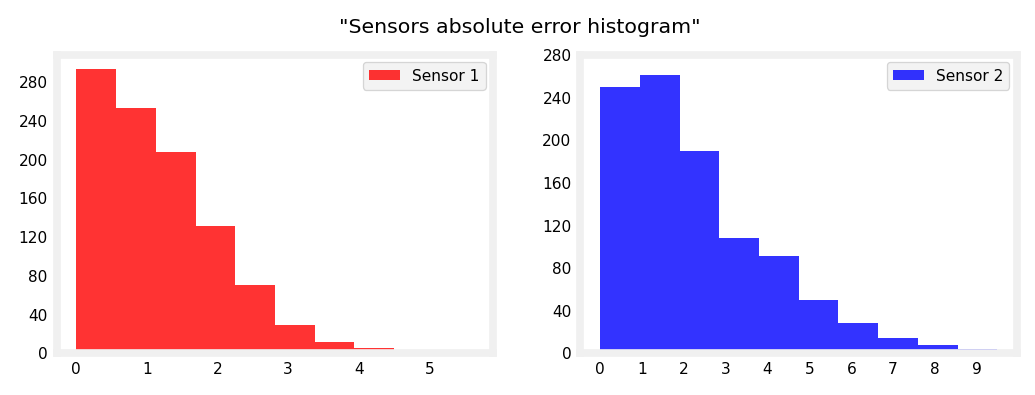

In [9]:
# visualization of absolute error
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(1, 2, sharex= False, sharey= False, figsize= (6, 2), dpi= 184)
ax[0].hist(df['Sensor_1'], color= 'red', alpha= 0.8, label= 'Sensor 1')
ax[0].set_xticks(np.arange(0, 6, 1))
ax[0].set_xticklabels(np.arange(0, 6, 1), fontsize= 6)
ax[0].set_yticks(np.arange(0, 320, 40))
ax[0].set_yticklabels(np.arange(0, 320, 40), fontsize= 6)

ax[1].hist(df['Sensor_2'], color= 'blue', alpha= 0.8, label= 'Sensor 2')
ax[1].set_xticks(np.arange(0, 10, 1))
ax[1].set_xticklabels(np.arange(0, 10, 1), fontsize= 6)
ax[1].set_yticks(np.arange(0, 320, 40))
ax[1].set_yticklabels(np.arange(0, 320, 40), fontsize= 6)

ax[0].grid(False)
ax[1].grid(False)

ax[0].legend(fontsize= 6)
ax[1].legend(fontsize= 6)

ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
fig.suptitle('"Sensors absolute error histogram"', fontsize= 8)
fig.set_facecolor('white');

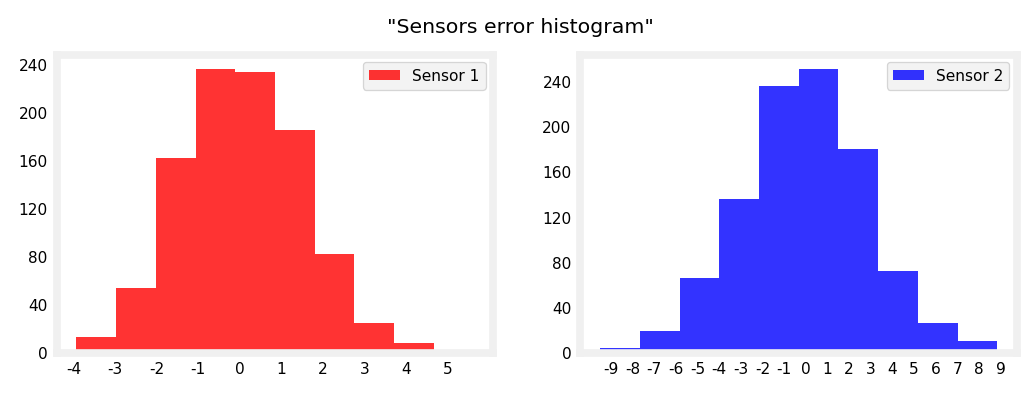

In [10]:
# visualization of row error
df= sensors_data.copy()
# finding the error for each sensor
for column in df.columns.to_list():
    df[column]= df[column] - 100

plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(1, 2, sharex= False, sharey= False, figsize= (6, 2), dpi= 184)
ax[0].hist(df['Sensor_1'], color= 'red', alpha= 0.8, label= 'Sensor 1')
ax[0].set_xticks(np.arange(-4, 6, 1))
ax[0].set_xticklabels(np.arange(-4, 6, 1), fontsize= 6)
ax[0].set_yticks(np.arange(0, 280, 40))
ax[0].set_yticklabels(np.arange(0, 280, 40), fontsize= 6)

ax[1].hist(df['Sensor_2'], color= 'blue', alpha= 0.8, label= 'Sensor 2')
ax[1].set_xticks(np.arange(-9, 10, 1))
ax[1].set_xticklabels(np.arange(-9, 10, 1), fontsize= 6)
ax[1].set_yticks(np.arange(0, 280, 40))
ax[1].set_yticklabels(np.arange(0, 280, 40), fontsize= 6)

ax[0].grid(False)
ax[1].grid(False)

ax[0].legend(fontsize= 6)
ax[1].legend(fontsize= 6)

ax[0].set_facecolor('white')
ax[1].set_facecolor('white')
fig.suptitle('"Sensors error histogram"', fontsize= 8)
fig.set_facecolor('white');

In [11]:
# statistical informations about row errors
df.describe()

,Sensor_1,Sensor_2
count,1000.000000,1000.000000
mean,0.081944,-0.044054
std,1.453548,2.868141
min,-3.926312,-9.490059
25%,-0.974493,-1.925282
50%,0.058905,-0.064364
75%,1.076676,1.761553
max,5.624231,8.836129


In [12]:
for column in df.columns:
    mean= df[column].mean()
    variance= np.sum((df[column] - mean) ** 2) / 1000
    print(f'{column}:\nmean of errors= {np.round(mean, 4)}\nvariance of errors= {np.round(variance)}\n')

Sensor_1:
mean of errors= 0.0819
variance of errors= 2.0

Sensor_2:
mean of errors= -0.0441
variance of errors= 8.0



lets work on the other dataset

In [13]:
oscillator= pd.read_excel('Datasets/Oscillator.xlsx')
oscillator.head()

,True Position,Sensor 1 (Position),Sensor 2 (Position)
0,5.000000,5.921333,5.512687
1,6.075000,5.488294,7.545318
2,7.212500,5.315266,13.435979
3,8.322638,8.954242,10.158366
4,9.401469,10.009786,1.276876


In [14]:
# number of records and columns
oscillator.shape

(501, 3)

In [15]:
# the type of columns and non-null values
oscillator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   True Position        501 non-null    float64
 1   Sensor 1 (Position)  501 non-null    float64
 2   Sensor 2 (Position)  501 non-null    float64
dtypes: float64(3)
memory usage: 11.9 KB


In [16]:
# statistical informations about original dataset
oscillator.describe()

,True Position,Sensor 1 (Position),Sensor 2 (Position)
count,501.000000,501.000000,501.000000
mean,0.964856,0.963705,1.070830
std,9.168559,9.345106,9.430618
min,-17.685065,-20.571334,-22.359106
25%,-6.365299,-6.505035,-5.974760
50%,1.634430,1.145093,1.470359
75%,7.468030,7.416136,7.761633
max,20.711145,24.403170,25.225684


In [17]:
# make a copy of original dataset to work on
df= oscillator.copy()

RMSE

In [18]:
# calculating the RMSE
for column in df.columns[1 : ]:
    rms= np.sqrt(np.sum((df['True Position'] - df[column]) ** 2) / len(df[column]))
    print(f'{column[ : 8]}:\nRMSE= {np.round(rms, 4)}\n')

Sensor 1:
RMSE= 1.5636

Sensor 2:
RMSE= 2.9104



In [19]:
rms_s1= np.sqrt(np.sum((df['True Position'] - df['Sensor 1 (Position)']) ** 2) / len(df['Sensor 1 (Position)']))
rms_s2= np.sqrt(np.sum((df['True Position'] - df['Sensor 2 (Position)']) ** 2) / len(df['Sensor 2 (Position)']))

Kalman Filter

In [20]:
# calculating the variance(noise) of each sensor
sensor1_noise= np.var(sensors_data['Sensor_1'] - 100)
sensor2_noise= np.var(sensors_data['Sensor_2'] - 100)

In [21]:
def run_kalman_filter(measurements, R_value, A, H, Q, x0, P0):
    x= x0.copy()
    P= P0.copy()
    estimates= []

    for z in measurements:
        # Predict
        x= A @ x
        P= A @ P @ A.T + Q

        # Update
        y= np.array([[z]]) - H @ x
        S= H @ P @ H.T + R_value
        K= P @ H.T @ np.linalg.inv(S)
        x= x + K @ y
        P= (np.eye(3) - K @ H) @ P

        estimates.append(x[0, 0])  # Store estimated position

    return estimates

In [22]:
# Setup
A= np.array([[1, 0.1, 0.005],
              [0, 1, 0.1],
              [-0.3, -0.1, 0]])
H= np.array([[1, 0, 0]])
Q= np.zeros((3, 3))
x0= np.array([[5], [10], [15]])
P0= np.diag([50, 50, 50])

R1= sensor1_noise
R2= sensor2_noise

In [23]:
# Sensor-only runs
estimates_sensor1= run_kalman_filter(oscillator['Sensor 1 (Position)'], R1, A, H, Q, x0, P0)
estimates_sensor2= run_kalman_filter(oscillator['Sensor 2 (Position)'], R2, A, H, Q, x0, P0)

In [24]:
# RMSE calculation
rms1= np.sqrt(np.mean((oscillator['True Position'] - estimates_sensor1) ** 2))
rms2= np.sqrt(np.mean((oscillator['True Position'] - estimates_sensor2) ** 2))

print(f"RMSE Sensor 1: {rms1:.4f}")
print(f"RMSE Sensor 2: {rms2:.4f}")

RMSE Sensor 1: 0.1893
RMSE Sensor 2: 0.3995


Modifying and data fusion

In [25]:
H= np.array([[1, 0, 0],
             [1, 0, 0]])  # Each sensor measures position

R= np.array([[R1, 0],
             [0, R2]])  # Combined measurement noise

# Run the Kalman Filter using both sensors
x= x0.copy()
P= P0.copy()
estimates_combined= []
for z1, z2 in zip(oscillator['Sensor 1 (Position)'], oscillator['Sensor 2 (Position)']):
    # Combine measurements into a 2x1 vector
    z= np.array([[z1], [z2]])
    
    # Predict
    x= A @ x
    P= A @ P @ A.T + Q

    # Update
    y= z - H @ x
    S= H @ P @ H.T + R
    K= P @ H.T @ np.linalg.inv(S)
    x= x + K @ y
    P= (np.eye(3) - K @ H) @ P

    # Save position estimate
    estimates_combined.append(x[0, 0])

rmse_combined= np.sqrt(np.mean((oscillator['True Position'] - estimates_combined) ** 2))
print(f"RMSE (Combined sensors): {rmse_combined:.4f}")

RMSE (Combined sensors): 0.1908


In [26]:
# printing final results for RMSE
print(f'initial RMSE for sensor 1= {rms_s1:.4f}\ninitial RMSE for sensor 2= {rms_s2:.4f}\n\nKalman Filter RMSE using only sensor 1= {rms1:.4f}\nKalman Filter RMSE using only sensor 2= {rms2:.4f}\n\nKalman Filter RMSE using both sensors= {rmse_combined:.4f}')

initial RMSE for sensor 1= 1.5636
initial RMSE for sensor 2= 2.9104

Kalman Filter RMSE using only sensor 1= 0.1893
Kalman Filter RMSE using only sensor 2= 0.3995

Kalman Filter RMSE using both sensors= 0.1908


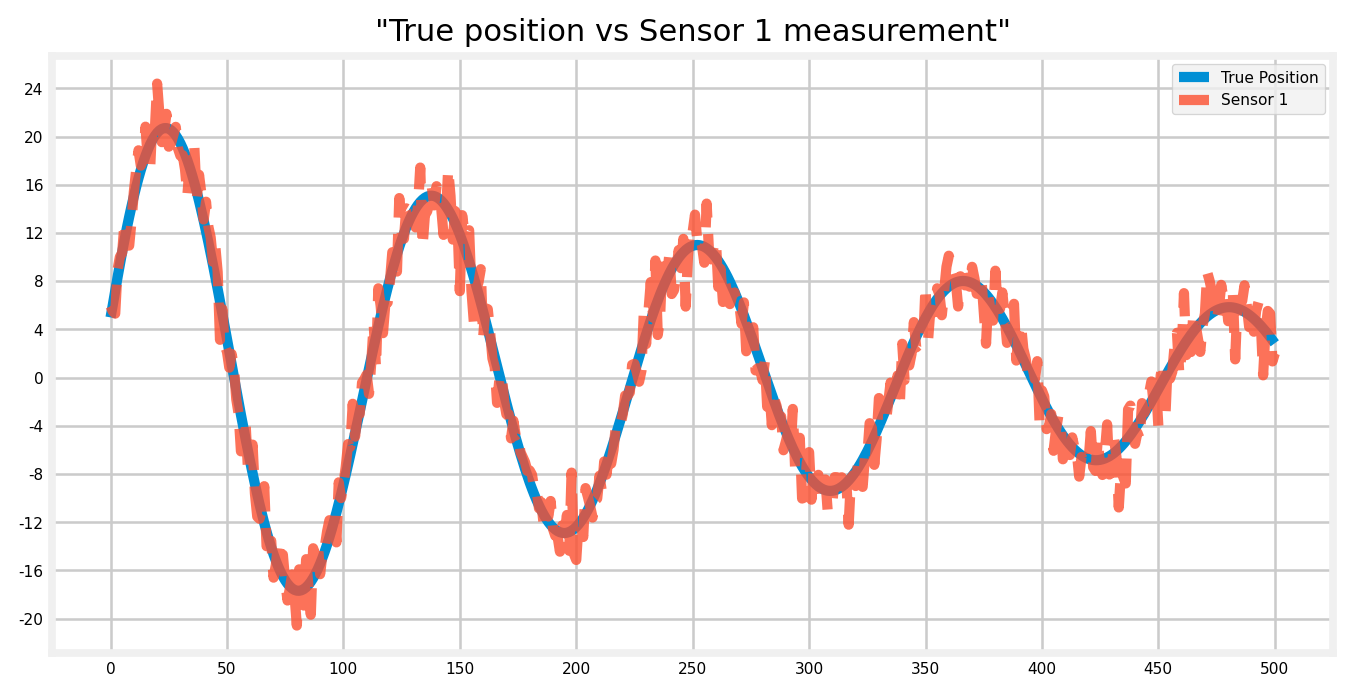

In [27]:
# Visualization of true values vs sensor 1 measurements
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 184)
ax.plot(oscillator['True Position'], label= 'True Position', linewidth= 4)
ax.plot(oscillator['Sensor 1 (Position)'], label= 'Sensor 1', linestyle= '--', alpha= 0.8)
ax.set_xticks(np.arange(0, 550, 50))
ax.set_xticklabels(np.arange(0, 550, 50), fontsize= 6)
ax.set_yticks(np.arange(-20, 28, 4))
ax.set_yticklabels(np.arange(-20, 28, 4), fontsize= 6)

ax.legend(fontsize= 6)

ax.set_title('"True position vs Sensor 1 measurement"', fontsize= 12)

ax.set_facecolor('white')
fig.set_facecolor('white');

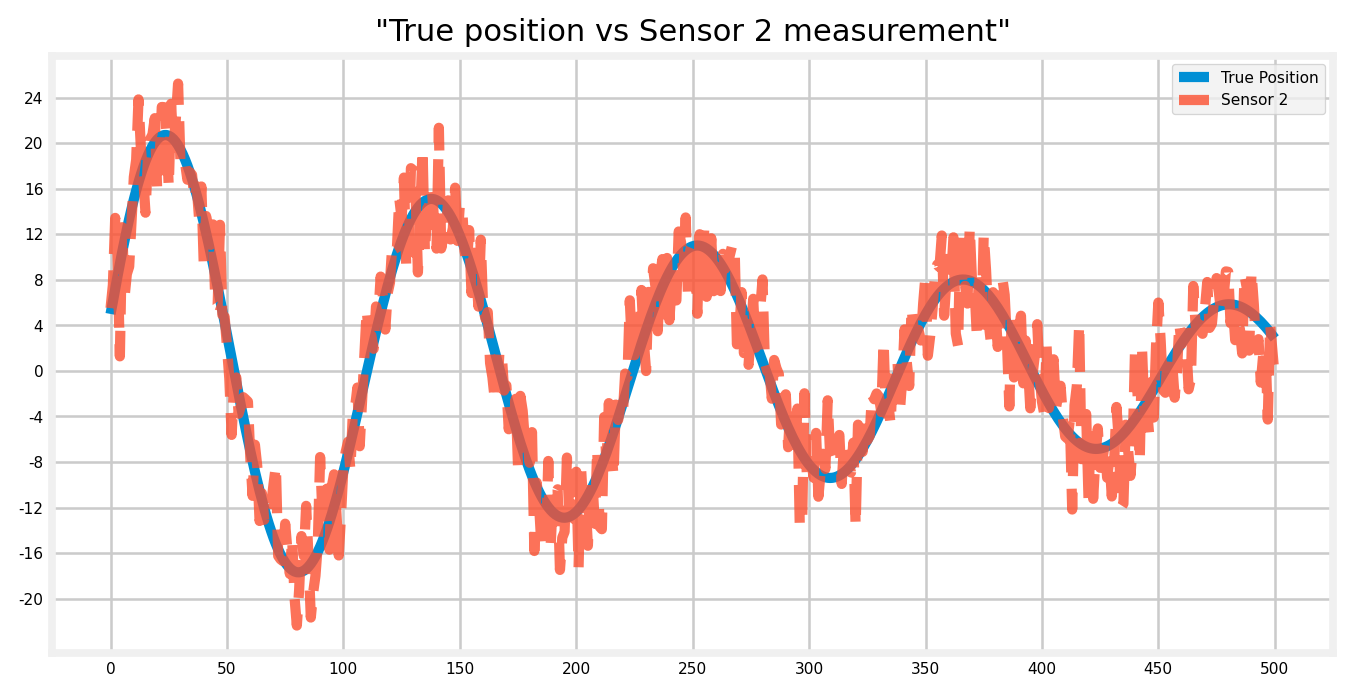

In [28]:
# Visualization of true values vs sensor 2 measurements
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 184)
ax.plot(oscillator['True Position'], label= 'True Position', linewidth= 4)
ax.plot(oscillator['Sensor 2 (Position)'], label= 'Sensor 2', linestyle= '--', alpha= 0.8)
ax.set_xticks(np.arange(0, 550, 50))
ax.set_xticklabels(np.arange(0, 550, 50), fontsize= 6)
ax.set_yticks(np.arange(-20, 28, 4))
ax.set_yticklabels(np.arange(-20, 28, 4), fontsize= 6)

ax.legend(fontsize= 6)

ax.set_title('"True position vs Sensor 2 measurement"', fontsize= 12)

ax.set_facecolor('white')
fig.set_facecolor('white');

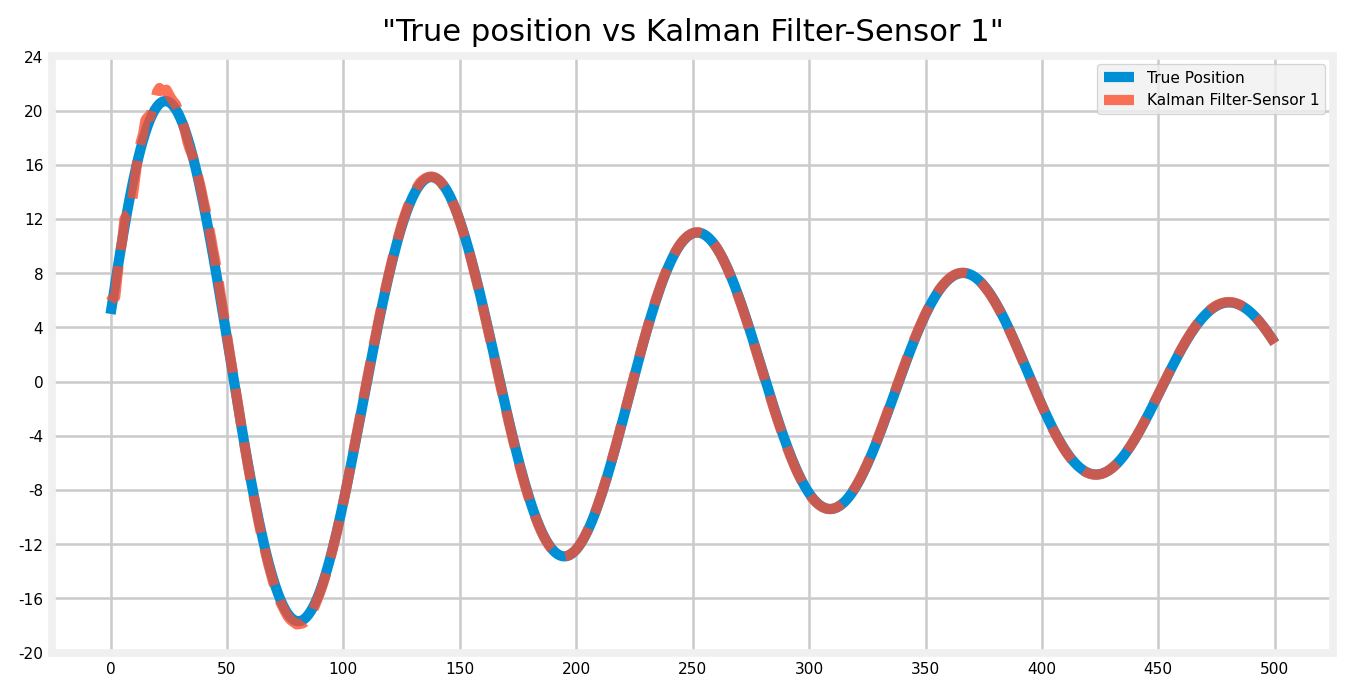

In [29]:
# Visualization of true values vs Kalman filter with sensor 1 measurements
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 184)
ax.plot(oscillator['True Position'], label= 'True Position', linewidth= 4)
ax.plot(estimates_sensor1, label= 'Kalman Filter-Sensor 1', linestyle= '--', alpha= 0.8)
ax.set_xticks(np.arange(0, 550, 50))
ax.set_xticklabels(np.arange(0, 550, 50), fontsize= 6)
ax.set_yticks(np.arange(-20, 28, 4))
ax.set_yticklabels(np.arange(-20, 28, 4), fontsize= 6)

ax.legend(fontsize= 6)

ax.set_title('"True position vs Kalman Filter-Sensor 1"', fontsize= 12)

ax.set_facecolor('white')
fig.set_facecolor('white');

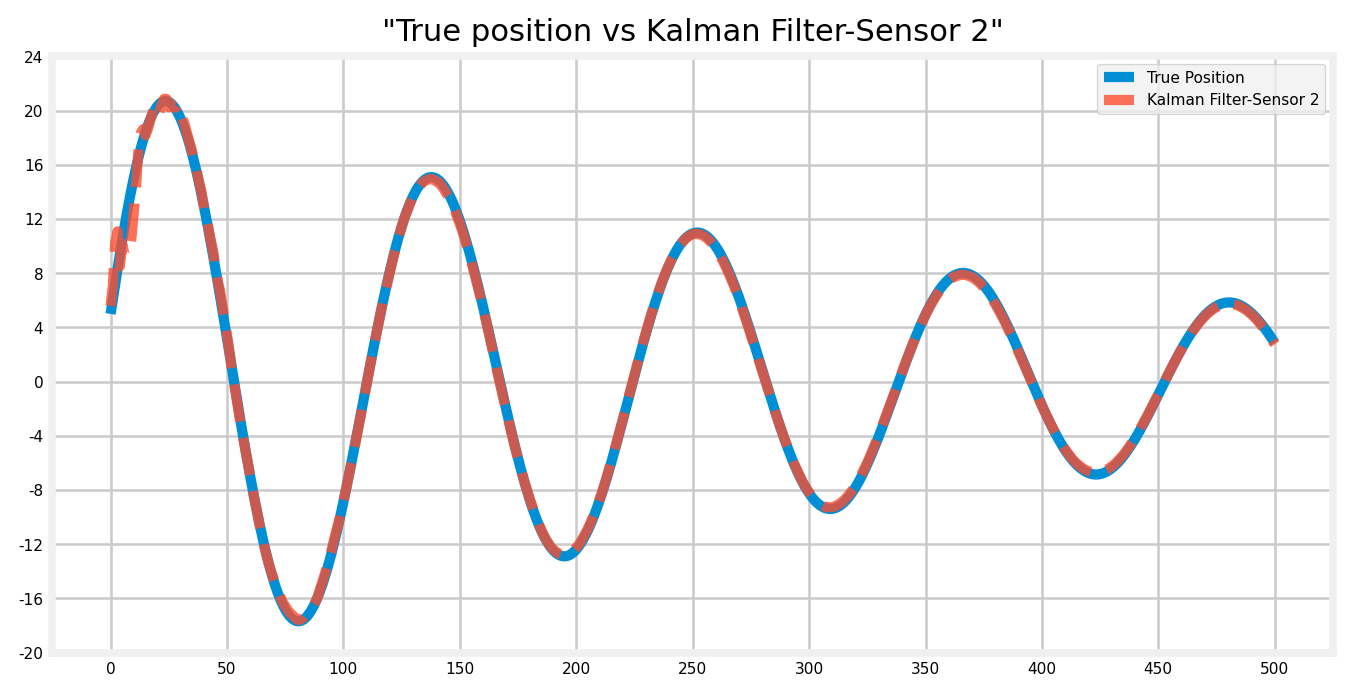

In [30]:
# Visualization of true values vs Kalman filter with sensor 2 measurements
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 184)
ax.plot(oscillator['True Position'], label= 'True Position', linewidth= 4)
ax.plot(estimates_sensor2, label= 'Kalman Filter-Sensor 2', linestyle= '--', alpha= 0.8)
ax.set_xticks(np.arange(0, 550, 50))
ax.set_xticklabels(np.arange(0, 550, 50), fontsize= 6)
ax.set_yticks(np.arange(-20, 28, 4))
ax.set_yticklabels(np.arange(-20, 28, 4), fontsize= 6)

ax.legend(fontsize= 6)

ax.set_title('"True position vs Kalman Filter-Sensor 2"', fontsize= 12)

ax.set_facecolor('white')
fig.set_facecolor('white');

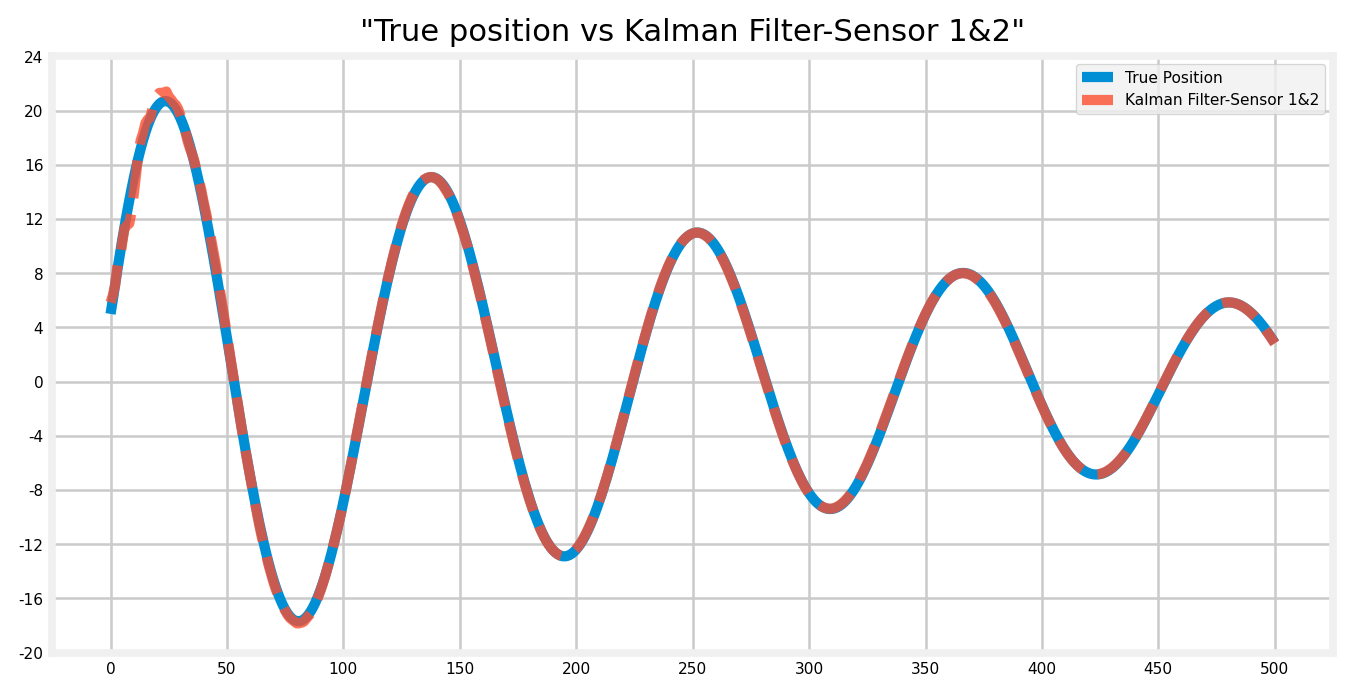

In [31]:
# Visualization of true values vs Kalman filter with sensor 1 & 2 measurements
plt.style.use('fivethirtyeight')
fig, ax= plt.subplots(figsize= (8, 4), dpi= 184)
ax.plot(oscillator['True Position'], label= 'True Position', linewidth= 4)
ax.plot(estimates_combined, label= 'Kalman Filter-Sensor 1&2', linestyle= '--', alpha= 0.8)
ax.set_xticks(np.arange(0, 550, 50))
ax.set_xticklabels(np.arange(0, 550, 50), fontsize= 6)
ax.set_yticks(np.arange(-20, 28, 4))
ax.set_yticklabels(np.arange(-20, 28, 4), fontsize= 6)

ax.legend(fontsize= 6)

ax.set_title('"True position vs Kalman Filter-Sensor 1&2"', fontsize= 12)

ax.set_facecolor('white')
fig.set_facecolor('white');